Using TensorFlow backend.


Loading weights from  C:/Users/user/Desktop/Mask-RCNN-TF2-master222/model/Kangaro_mask_rcnn_trained4_22_1.h5
[[-0.04428066 -0.02214033  0.04232371  0.02018338]
 [-0.03131115 -0.03131115  0.02935421  0.02935421]
 [-0.02214033 -0.04428066  0.02018338  0.04232371]
 ...
 [ 0.16822177  0.5224671   1.583246    1.2290007 ]
 [ 0.37573385  0.37573385  1.3757339   1.3757339 ]
 [ 0.5224671   0.16822177  1.2290007   1.583246  ]]


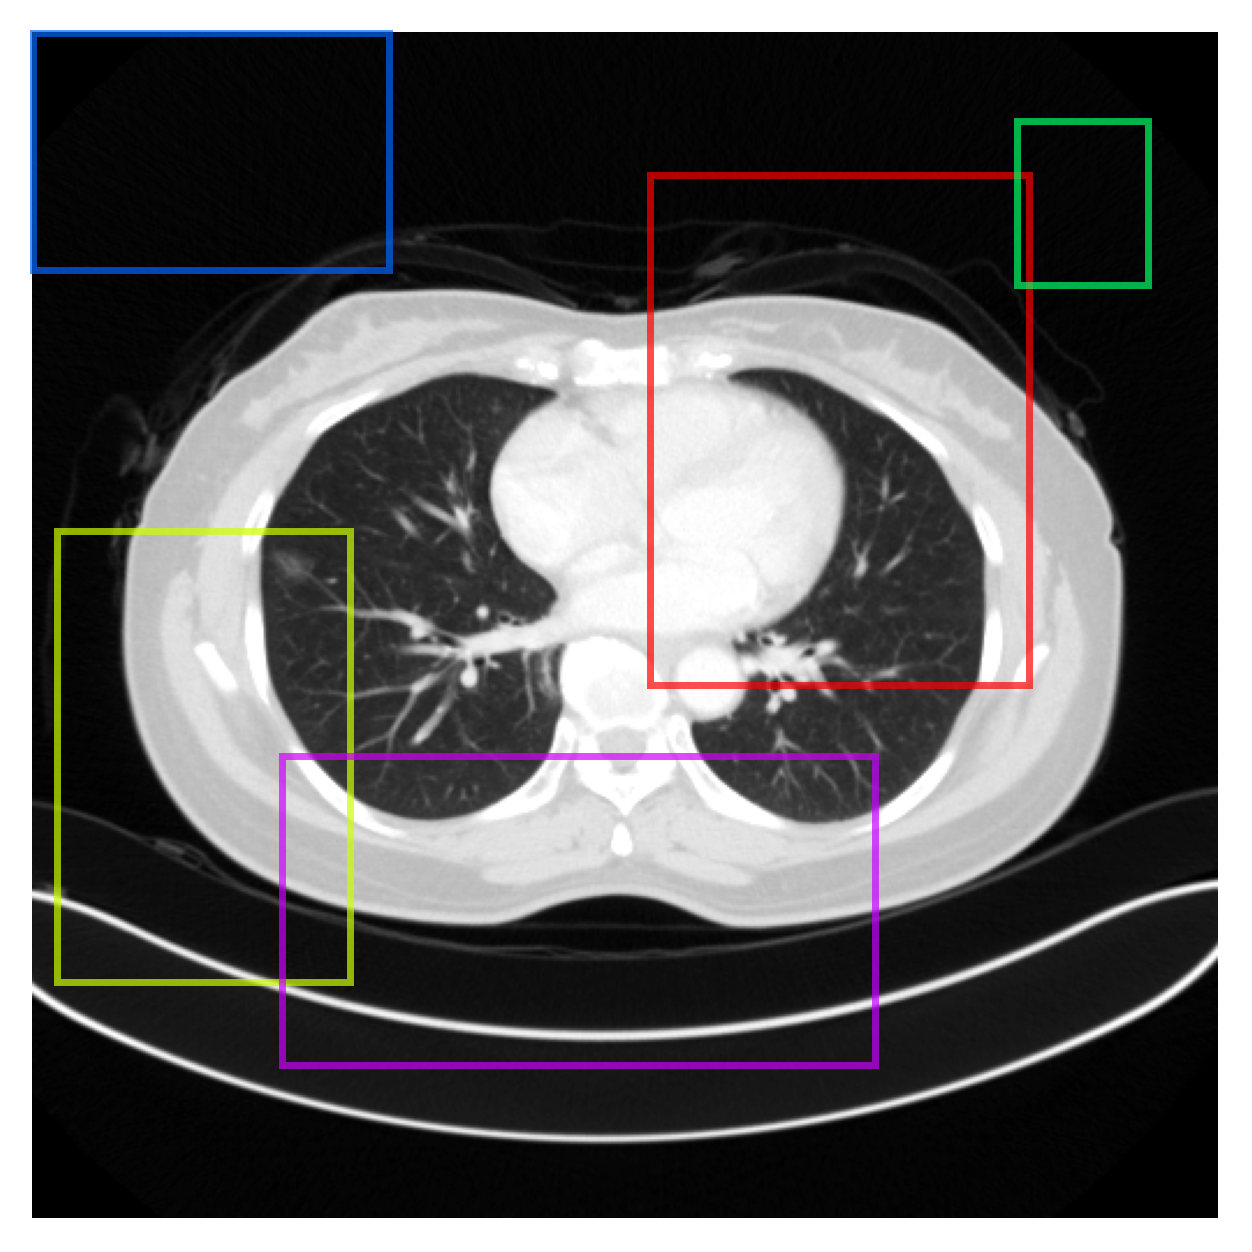

In [1]:
import mrcnn_directed
import mrcnn_directed.config
import mrcnn_directed.model
import mrcnn_directed.visualize
import cv2
import os
import numpy

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG','dataset']

POST_NMS_ROIS_INFERENCE = 5

REGION_PROPOSALS = numpy.zeros(shape=(1, POST_NMS_ROIS_INFERENCE, 4), dtype=numpy.float32)

REGION_PROPOSALS[0, 0, :] = [0.0,  0.0 ,  0.2,   0.3]
REGION_PROPOSALS[0, 1, :] = [0.42, 0.02,  0.8,   0.267]
REGION_PROPOSALS[0, 2, :] = [0.12, 0.52,  0.55,  0.84]
REGION_PROPOSALS[0, 3, :] = [0.61, 0.71,  0.87,  0.21]
REGION_PROPOSALS[0, 4, :] = [0.074, 0.83, 0.212, 0.94]

# REGION_PROPOSALS[0, 0, :] = [0.49552074, 0.        , 0.53763664, 0.09105143]
# REGION_PROPOSALS[0, 1, :] = [0.5294977 , 0.39210293, 0.63644147, 0.44242138]
# REGION_PROPOSALS[0, 2, :] = [0.36204672, 0.40500385, 0.6706183 , 0.54514766]
# REGION_PROPOSALS[0, 3, :] = [0.48107424, 0.08110721, 0.51513755, 0.17086479]
# REGION_PROPOSALS[0, 4, :] = [0.45803332, 0.15717855, 0.4798005 , 0.20352092]

class SimpleConfig(mrcnn_directed.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

    POST_NMS_ROIS_INFERENCE = POST_NMS_ROIS_INFERENCE
    # If REGION_PROPOSALS is None, then the region proposals are produced by the RPN.
    # Otherwise, the user-defined region proposals are used.
    REGION_PROPOSALS = REGION_PROPOSALS
    # REGION_PROPOSALS = None

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn_directed.model.MaskRCNNDirectedRPN(mode="inference", 
                                                 config=SimpleConfig(),
                                                 model_dir=os.getcwd())

MODEL_DIR = 'C:/Users/user/Desktop/Mask-RCNN-TF2-master222/model/'
model_path = os.path.join(MODEL_DIR, "Kangaro_mask_rcnn_trained4_22_1.h5")
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)
# Load the weights into the model.
# model.load_weights(filepath="mask_rcnn_coco.h5", 
#                    by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("D:/Hospital_data/nodule/partial/image/001/0061.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
anchor = model.get_anchors(image.shape)
print(anchor)
# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

r2 = r.copy()

r2[:, 0] = r2[:, 0] * image.shape[0]
r2[:, 2] = r2[:, 2] * image.shape[0]
r2[:, 1] = r2[:, 1] * image.shape[1]
r2[:, 3] = r2[:, 3] * image.shape[1]

# Visualize the detected objects.
mrcnn_directed.visualize.display_instances_RPN(image=image, 
                                               boxes=r2)


Loading weights from  C:/Users/user/Desktop/Mask-RCNN-TF2-master222/model/Kangaro_mask_rcnn_trained3.h5
(65472, 4)
------------------------------------------------------------
[[[-0.04428066 -0.02214033  0.04232371  0.02018338]
  [-0.03131115 -0.03131115  0.02935421  0.02935421]
  [-0.02214033 -0.04428066  0.02018338  0.04232371]
  ...
  [ 0.16822177  0.5224671   1.583246    1.2290007 ]
  [ 0.37573385  0.37573385  1.3757339   1.3757339 ]
  [ 0.5224671   0.16822177  1.2290007   1.583246  ]]

 [[-0.04428066 -0.02214033  0.04232371  0.02018338]
  [-0.03131115 -0.03131115  0.02935421  0.02935421]
  [-0.02214033 -0.04428066  0.02018338  0.04232371]
  ...
  [ 0.16822177  0.5224671   1.583246    1.2290007 ]
  [ 0.37573385  0.37573385  1.3757339   1.3757339 ]
  [ 0.5224671   0.16822177  1.2290007   1.583246  ]]]


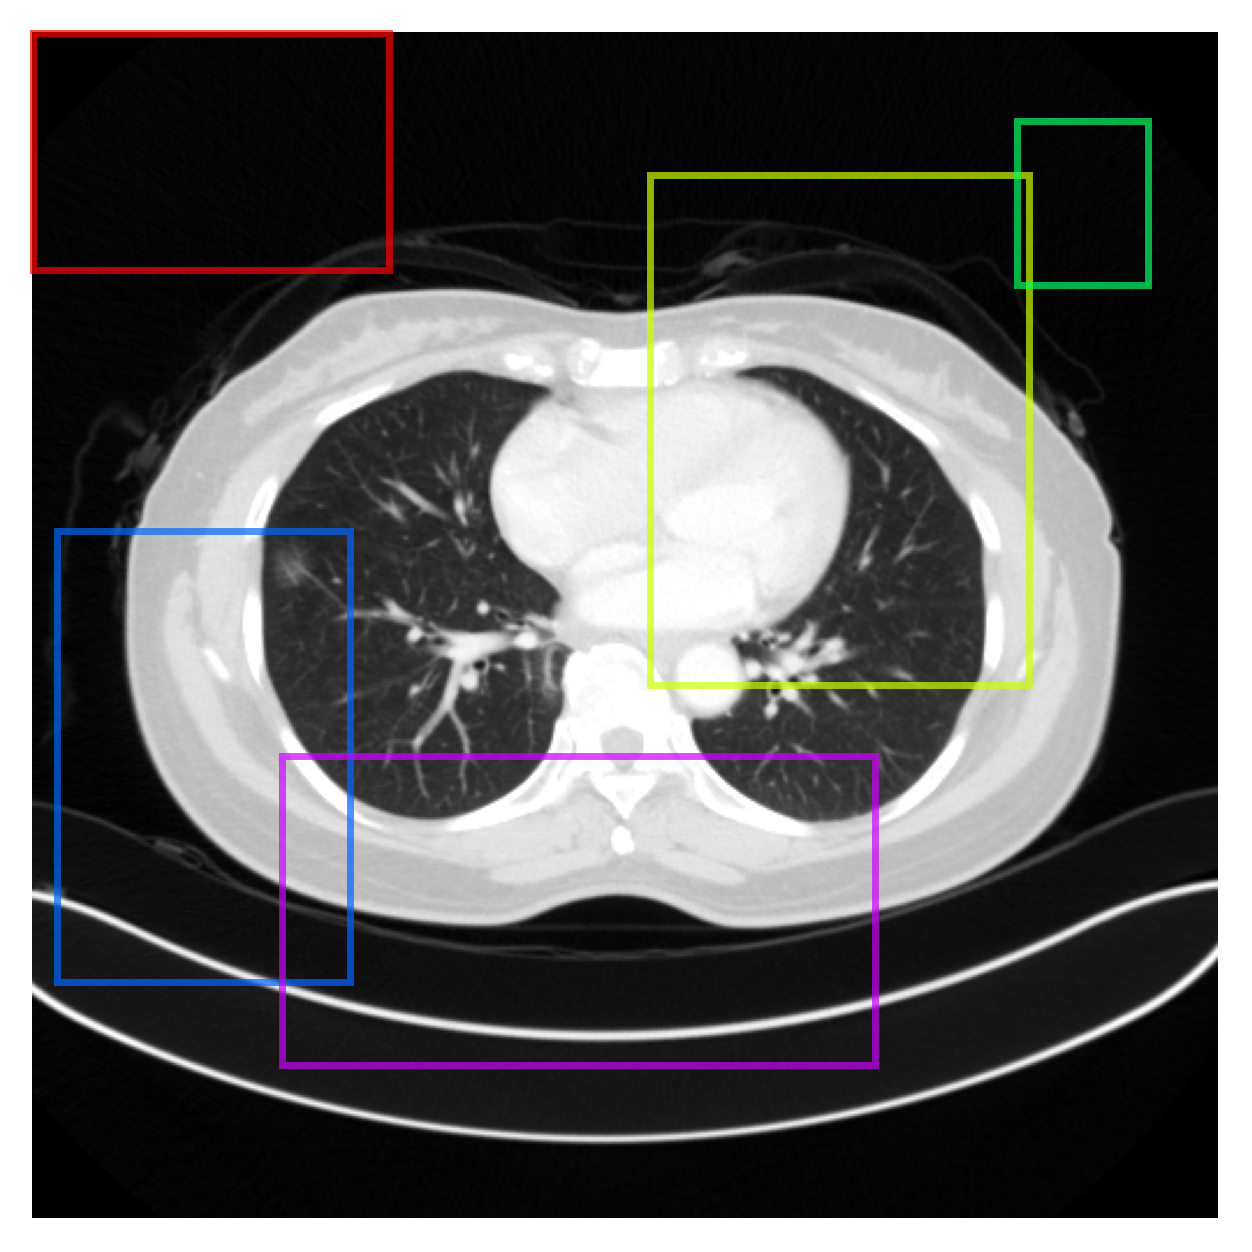

In [15]:
import mrcnn_directed
import mrcnn_directed.config
import mrcnn_directed.model
import mrcnn_directed.visualize
import mrcnn_directed.utils
import cv2
import os
import numpy

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG','dataset']

POST_NMS_ROIS_INFERENCE = 5

REGION_PROPOSALS = numpy.zeros(shape=(1, POST_NMS_ROIS_INFERENCE, 4), dtype=numpy.float32)

REGION_PROPOSALS[0, 0, :] = [0.0,  0.0 ,  0.2,   0.3]
REGION_PROPOSALS[0, 1, :] = [0.42, 0.02,  0.8,   0.267]
REGION_PROPOSALS[0, 2, :] = [0.12, 0.52,  0.55,  0.84]
REGION_PROPOSALS[0, 3, :] = [0.61, 0.71,  0.87,  0.21]
REGION_PROPOSALS[0, 4, :] = [0.074, 0.83, 0.212, 0.94]

# REGION_PROPOSALS[0, 0, :] = [0.49552074, 0.        , 0.53763664, 0.09105143]
# REGION_PROPOSALS[0, 1, :] = [0.5294977 , 0.39210293, 0.63644147, 0.44242138]
# REGION_PROPOSALS[0, 2, :] = [0.36204672, 0.40500385, 0.6706183 , 0.54514766]
# REGION_PROPOSALS[0, 3, :] = [0.48107424, 0.08110721, 0.51513755, 0.17086479]
# REGION_PROPOSALS[0, 4, :] = [0.45803332, 0.15717855, 0.4798005 , 0.20352092]

class SimpleConfig(mrcnn_directed.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

    POST_NMS_ROIS_INFERENCE = POST_NMS_ROIS_INFERENCE
    # If REGION_PROPOSALS is None, then the region proposals are produced by the RPN.
    # Otherwise, the user-defined region proposals are used.
    REGION_PROPOSALS = REGION_PROPOSALS
    # REGION_PROPOSALS = None

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn_directed.model.MaskRCNNDirectedRPN(mode="inference", 
                                                 config=SimpleConfig(),
                                                 model_dir=os.getcwd())

MODEL_DIR = 'C:/Users/user/Desktop/Mask-RCNN-TF2-master222/model/'
model_path = os.path.join(MODEL_DIR, "Kangaro_mask_rcnn_trained3.h5")
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)
# Load the weights into the model.
# model.load_weights(filepath="mask_rcnn_coco.h5", 
#                    by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("D:/Hospital_data/nodule/partial/image/001/0062.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
anchors = model.get_anchors(image.shape)
print(anchors.shape)
# for i in model.get_anchors(image.shape):
#     print(i)
print('-'*60)
print(numpy.broadcast_to(anchors, (2,) + anchors.shape))
# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

r2 = r.copy()

r2[:, 0] = r2[:, 0] * image.shape[0]
r2[:, 2] = r2[:, 2] * image.shape[0]
r2[:, 1] = r2[:, 1] * image.shape[1]
r2[:, 3] = r2[:, 3] * image.shape[1]

model.detect_molded()
# Visualize the detected objects.
mrcnn_directed.visualize.display_instances_RPN(image=image, 
                                               boxes=r2)
